In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Dünya Kupası verilerini yükle
try:
    df_wc = pd.read_csv('world_cup_results.csv')
    print("✅ 'world_cup_results.csv' dosyası yüklendi.")
except FileNotFoundError:
    print("⚠️ 'world_cup_results.csv' bulunamadı. Örnek veri oluşturuluyor...")
    # Örnek Dünya Kupası verisi oluştur
    wc_data = {
        'Year': [2022, 2022, 2022, 2022, 2018, 2018, 2018, 2018, 2014, 2014, 2014, 2014,
                 2010, 2010, 2010, 2010, 2006, 2006, 2006, 2006, 2002, 2002, 2002, 2002],
        'Stage_Text': ['Şampiyon', 'Finalist', 'Yarı Final', 'Yarı Final',
                       'Şampiyon', 'Finalist', 'Yarı Final', 'Yarı Final',
                       'Şampiyon', 'Finalist', 'Yarı Final', 'Yarı Final',
                       'Şampiyon', 'Finalist', 'Yarı Final', 'Yarı Final',
                       'Şampiyon', 'Finalist', 'Yarı Final', 'Yarı Final',
                       'Şampiyon', 'Finalist', 'Yarı Final', 'Yarı Final'],
        'Country': ['Arjantin', 'Fransa', 'Hırvatistan', 'Fas',
                    'Fransa', 'Hırvatistan', 'Belçika', 'İngiltere',
                    'Almanya', 'Arjantin', 'Hollanda', 'Brezilya',
                    'İspanya', 'Hollanda', 'Almanya', 'Uruguay',
                    'İtalya', 'Fransa', 'Almanya', 'Portekiz',
                    'Brezilya', 'Almanya', 'Güney Kore', 'Türkiye']
    }
    df_wc = pd.DataFrame(wc_data)

# Sütun isimlerini ayarla (eğer farklıysa)
if len(df_wc.columns) >= 3:
    df_wc.columns = ['Year', 'Stage_Text', 'Country']

df_wc['Stage_Text'] = df_wc['Stage_Text'].astype(str).str.strip()

top_8_stages = ['Şampiyon', 'Finalist', 'Yarı Final']
df_wc['Top_8'] = df_wc['Stage_Text'].apply(
    lambda x: 1 if x in top_8_stages else 0
)

df_wc['Year'] = pd.to_numeric(df_wc['Year'], errors='coerce').astype('Int64')

country_mapping = {
    'Arjantin': 'Argentina', 'Brezilya': 'Brazil', 'Almanya': 'Germany',
    'Batı Almanya': 'Germany', 'İtalya': 'Italy', 'İspanya': 'Spain',
    'Fransa': 'France', 'Uruguay': 'Uruguay', 'İngiltere': 'United Kingdom',
    'Çekoslovakya': 'Czechia', 'Hollanda': 'Netherlands', 'İsveç': 'Sweden',
    'Macaristan': 'Hungary', 'Hırvatistan': 'Croatia', 'Türkiye': 'Turkiye',
    'Polonya': 'Poland', 'Fas': 'Morocco', 'Avusturya': 'Austria',
    'Yugoslavya': 'Yugoslavia', 'ABD': 'United States', 'Şili': 'Chile',
    'Sovyetler Birliği': 'Soviet Union', 'Portekiz': 'Portugal', 'Belçika': 'Belgium',
    'Bulgaristan': 'Bulgaria', 'Güney Kore': 'South Korea'
}
df_wc['Country'] = df_wc['Country'].replace(country_mapping)

print(f"✅ Toplam Satır Sayısı: {df_wc.shape[0]}")
print(f"✅ Top-8 Grubu (1) Sayısı: {df_wc['Top_8'].sum()}")
print(f"✅ Non-Top-8 Grubu (0) Sayısı: {len(df_wc[df_wc['Top_8'] == 0])}")
pd.set_option("display.float_format", lambda x: f"{x:.2f}")

✅ 'world_cup_results.csv' dosyası yüklendi.
✅ Toplam Satır Sayısı: 88
✅ Top-8 Grubu (1) Sayısı: 88
✅ Non-Top-8 Grubu (0) Sayısı: 0


In [5]:
# FAOSTAT Gıda verilerini yükle
food_files = [
    'FAOSTAT_data.csv',
    'FoodBalanceSheets_E_All_Data.csv',
    'food_data.csv'
]

df_food_raw = None
for food_file in food_files:
    try:
        df_food_raw = pd.read_csv(food_file, encoding='utf-8')
        print(f"✅ '{food_file}' dosyası yüklendi.")
        break
    except FileNotFoundError:
        continue
    except UnicodeDecodeError:
        try:
            df_food_raw = pd.read_csv(food_file, encoding='latin-1')
            print(f"✅ '{food_file}' dosyası yüklendi (latin-1 encoding).")
            break
        except:
            continue

if df_food_raw is None:
    print("⚠️ FAOSTAT dosyası bulunamadı. Örnek gıda verisi oluşturuluyor...")
    # Örnek gıda verisi oluştur
    countries = ['Argentina', 'Brazil', 'Germany', 'France', 'Italy', 'Spain', 
                 'Netherlands', 'Croatia', 'Morocco', 'Belgium', 'United Kingdom',
                 'Portugal', 'Uruguay', 'South Korea', 'Turkiye']
    years = list(range(2002, 2023))
    
    food_data = []
    for country in countries:
        for year in years:
            food_data.append({
                'Area': country,
                'Year': year,
                'Element': 'Food supply (kcal/capita/day)',
                'Value': np.random.uniform(2500, 3500)
            })
    df_food_raw = pd.DataFrame(food_data)

# Gıda verisini işle
required_cols = ['Area', 'Year', 'Element', 'Value']

# Sütun isimlerini kontrol et ve uygun olanları bul
available_cols = df_food_raw.columns.tolist()
print(f"Mevcut sütunlar: {available_cols[:10]}...")  # İlk 10 sütunu göster

# Gerekli sütunları bul veya eşleştir
col_mapping = {}
for req_col in required_cols:
    if req_col in available_cols:
        col_mapping[req_col] = req_col
    else:
        # Alternatif sütun isimlerini ara
        for col in available_cols:
            if req_col.lower() in col.lower():
                col_mapping[req_col] = col
                break

try:
    if len(col_mapping) == len(required_cols):
        df_food_cleaned = df_food_raw[[col_mapping[c] for c in required_cols]].copy()
        df_food_cleaned.columns = ['Country', 'Year', 'Indicator', 'Value']
    else:
        # Eğer eşleşme yapılamadıysa örnek veri kullan
        df_food_cleaned = df_food_raw[required_cols].copy()
        df_food_cleaned.columns = ['Country', 'Year', 'Indicator', 'Value']

    df_food_cleaned['Year'] = pd.to_numeric(df_food_cleaned['Year'], errors='coerce')

    df_food_pivot = df_food_cleaned.pivot_table(
        index=['Country', 'Year'],
        columns='Indicator',
        values='Value',
        aggfunc='first'
    ).reset_index()

    df_food_pivot.columns.name = None
    df_food_pivot['Year'] = df_food_pivot['Year'].astype('Int64', errors='ignore')

    print("✅ FAOSTAT Verisi Başarıyla Temizlendi ve Pivotlandı.")
    print(f"\nFinal Gıda Sütun İsimleri: {df_food_pivot.columns.tolist()}")
    print(f"Satır sayısı: {len(df_food_pivot)}")

except Exception as e:
    print(f"⚠️ Gıda verisi işlenirken hata: {e}")
    # Boş pivot tablo oluştur
    df_food_pivot = pd.DataFrame(columns=['Country', 'Year', 'Value'])
    df_food_pivot['Year'] = df_food_pivot['Year'].astype('Int64', errors='ignore')
    print("✅ Boş gıda pivot tablosu oluşturuldu.")

⚠️ FAOSTAT dosyası bulunamadı. Örnek gıda verisi oluşturuluyor...
Mevcut sütunlar: ['Area', 'Year', 'Element', 'Value']...
✅ FAOSTAT Verisi Başarıyla Temizlendi ve Pivotlandı.

Final Gıda Sütun İsimleri: ['Country', 'Year', 'Food supply (kcal/capita/day)']
Satır sayısı: 315


In [6]:
# Dünya Bankası verilerini yükle
api_files = [
    'API_SP.POP.TOTL_DS2_en_csv_v2_280659.csv',
    'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_280632.csv'
]

df_gdp_list = []
print("\n--- Dünya Bankası Dosyaları Yükleniyor ---")
for path in api_files:
    try:
        df = pd.read_csv(path, skiprows=4)
        df_gdp_list.append(df)
        print(f"✅ {path} yüklendi.")
    except FileNotFoundError:
        print(f"⚠️ {path} bulunamadı.")

if len(df_gdp_list) == 0:
    print("⚠️ Dünya Bankası dosyaları bulunamadı. Örnek veri oluşturuluyor...")
    # Örnek GDP/Population verisi oluştur
    countries = ['Argentina', 'Brazil', 'Germany', 'France', 'Italy', 'Spain',
                 'Netherlands', 'Croatia', 'Morocco', 'Belgium', 'United Kingdom',
                 'Portugal', 'Uruguay', 'South Korea', 'Turkiye']
    years = list(range(2000, 2023))
    
    gdp_data = []
    for country in countries:
        base_gdp = np.random.uniform(100e9, 4000e9)
        base_pop = np.random.uniform(5e6, 200e6)
        for year in years:
            gdp_data.append({
                'Country Name': country,
                'Indicator Name': 'GDP (current US$)',
                'Year': str(year),
                'Value': base_gdp * (1 + 0.02 * (year - 2000))
            })
            gdp_data.append({
                'Country Name': country,
                'Indicator Name': 'Population, total',
                'Year': str(year),
                'Value': base_pop * (1 + 0.01 * (year - 2000))
            })
    
    df_gdp_long = pd.DataFrame(gdp_data)
    
    df_gdp_final = df_gdp_long.pivot_table(
        index=['Country Name', 'Year'],
        columns='Indicator Name',
        values='Value'
    ).reset_index()
    
    df_gdp_final.columns.name = None
    df_gdp_final.rename(columns={
        'Country Name': 'Country',
        'Population, total': 'Population'
    }, inplace=True)
else:
    df_gdp_raw = pd.concat(df_gdp_list, ignore_index=True)
    
    # Mevcut yıl sütunlarını bul
    year_cols = [str(y) for y in range(2000, 2023) if str(y) in df_gdp_raw.columns]
    cols_to_keep = ['Country Name', 'Indicator Name'] + year_cols
    df_gdp_pivot = df_gdp_raw[cols_to_keep].copy()
    
    df_gdp_long = df_gdp_pivot.melt(
        id_vars=['Country Name', 'Indicator Name'],
        value_vars=year_cols,
        var_name='Year',
        value_name='Value'
    )
    
    df_gdp_final = df_gdp_long.pivot_table(
        index=['Country Name', 'Year'],
        columns='Indicator Name',
        values='Value'
    ).reset_index()
    
    df_gdp_final.columns.name = None
    df_gdp_final.rename(columns={
        'Country Name': 'Country',
        'Population, total': 'Population',
        'GDP per capita (current US$)': 'GDP_per_capita'
    }, inplace=True)

df_gdp_final['Year'] = pd.to_numeric(df_gdp_final['Year'], errors='coerce').astype('Int64')

print("\n--- Dünya Bankası Birleştirme Sonucu ---")
print("Temizlenmiş ve Pivotlanmış Dünya Bankası Verisinin İlk 5 Satırı:")
print(df_gdp_final.head())
print(f"\nFinal Dünya Bankası Sütun İsimleri: {df_gdp_final.columns.tolist()}")


--- Dünya Bankası Dosyaları Yükleniyor ---
✅ API_SP.POP.TOTL_DS2_en_csv_v2_280659.csv yüklendi.
✅ API_NY.GDP.MKTP.CD_DS2_en_csv_v2_280632.csv yüklendi.

--- Dünya Bankası Birleştirme Sonucu ---
Temizlenmiş ve Pivotlanmış Dünya Bankası Verisinin İlk 5 Satırı:
       Country  Year  GDP (current US$)  Population
0  Afghanistan  2000      3521418059.92 20130327.00
1  Afghanistan  2001      2813571753.87 20284307.00
2  Afghanistan  2002      3825701439.00 21378117.00
3  Afghanistan  2003      4520946818.55 22733049.00
4  Afghanistan  2004      5224896718.68 23560654.00

Final Dünya Bankası Sütun İsimleri: ['Country', 'Year', 'GDP (current US$)', 'Population']


In [7]:
# Tüm verileri birleştir
df_main = df_wc.merge(
    df_food_pivot,
    on=['Country', 'Year'],
    how='left'
)

df_main = df_main.merge(
    df_gdp_final,
    on=['Country', 'Year'],
    how='left'
)

print("✅ Tüm Veriler Başarıyla Tek Bir DataFrame'de Birleştirildi.")
print(f"\nFinal Veri Seti Boyutu: {df_main.shape}")

# Mevcut sütunları kontrol et
available_columns = df_main.columns.tolist()
print(f"\nFinal Sütun İsimleri: {available_columns}")

# Eksik veri kontrolü - sadece mevcut sütunlar için
check_cols = ['Top_8', 'Country', 'Year']
for col in ['Value', 'GDP (current US$)', 'Population']:
    if col in available_columns:
        check_cols.append(col)

print("\nEksik Veri Sayısı (Mevcut Sütunlar):")
print(df_main[check_cols].isnull().sum())

print("\nİlk 5 Satır:")
print(df_main.head())

✅ Tüm Veriler Başarıyla Tek Bir DataFrame'de Birleştirildi.

Final Veri Seti Boyutu: (88, 7)

Final Sütun İsimleri: ['Year', 'Stage_Text', 'Country', 'Top_8', 'Food supply (kcal/capita/day)', 'GDP (current US$)', 'Population']

Eksik Veri Sayısı (Mevcut Sütunlar):
Top_8                 0
Country               0
Year                  0
GDP (current US$)    65
Population           65
dtype: int64

İlk 5 Satır:
   Year  Stage_Text    Country  Top_8  Food supply (kcal/capita/day)  \
0  2022    Şampiyon  Argentina      1                        2778.09   
1  2022    Finalist     France      1                        2891.52   
2  2022  Yarı Final    Croatia      1                        2759.45   
3  2022  Yarı Final    Morocco      1                        2799.98   
4  2018    Şampiyon     France      1                        3089.34   

   GDP (current US$)  Population  
0    632790070063.12 45407904.00  
1   2796302210398.84 68065015.00  
2     71198635101.95  3855641.00  
3    1309519263

In [7]:
print("--- Veri Seti Kontrolü ---")

print("\n[1] df_wc (Dünya Kupası) Kontrolü:")
print(f"Toplam Satır: {df_wc.shape[0]}")
print(f"Eşsiz Ülke Sayısı: {df_wc['Country'].nunique()}")
print(f"Yıl Sütunu Veri Tipi: {df_wc['Year'].dtype}")
print(f"İlk 5 Eşsiz Ülke Adı: {df_wc['Country'].unique()[:5]}")

print("\n[2] df_food_pivot (Gıda) Kontrolü:")
print(f"Toplam Satır: {df_food_pivot.shape[0]}")
print(f"Eşsiz Ülke Sayısı: {df_food_pivot['Country'].nunique()}")
print(f"Yıl Sütunu Veri Tipi: {df_food_pivot['Year'].dtype}")
if len(df_food_pivot) > 0:
    print(f"İlk 5 Eşsiz Ülke Adı: {df_food_pivot['Country'].unique()[:5]}")

print("\n[3] df_gdp_final (GSYİH/Nüfus) Kontrolü:")
print(f"Toplam Satır: {df_gdp_final.shape[0]}")
print(f"Eşsiz Ülke Sayısı: {df_gdp_final['Country'].nunique()}")
print(f"Yıl Sütunu Veri Tipi: {df_gdp_final['Year'].dtype}")
print(f"İlk 5 Eşsiz Ülke Adı: {df_gdp_final['Country'].unique()[:5]}")

--- Veri Seti Kontrolü ---

[1] df_wc (Dünya Kupası) Kontrolü:
Toplam Satır: 88
Eşsiz Ülke Sayısı: 25
Yıl Sütunu Veri Tipi: Int64
İlk 5 Eşsiz Ülke Adı: ['Argentina' 'France' 'Croatia' 'Morocco' 'Belgium']

[2] df_food_pivot (Gıda) Kontrolü:
Toplam Satır: 315
Eşsiz Ülke Sayısı: 15
Yıl Sütunu Veri Tipi: Int64
İlk 5 Eşsiz Ülke Adı: ['Argentina' 'Belgium' 'Brazil' 'Croatia' 'France']

[3] df_gdp_final (GSYİH/Nüfus) Kontrolü:
Toplam Satır: 6095
Eşsiz Ülke Sayısı: 265
Yıl Sütunu Veri Tipi: Int64
İlk 5 Eşsiz Ülke Adı: ['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria']


In [8]:
# Yıl veri tiplerini düzelt
df_wc['Year'] = pd.to_numeric(df_wc['Year'], errors='coerce').astype('Int64')
if len(df_food_pivot) > 0 and 'Year' in df_food_pivot.columns:
    df_food_pivot['Year'] = pd.to_numeric(df_food_pivot['Year'], errors='coerce').astype('Int64')

print("✅ Yıl Veri Tipleri Int64'e Dönüştürüldü.")
print(f"df_wc Year Tipi: {df_wc['Year'].dtype}")

✅ Yıl Veri Tipleri Int64'e Dönüştürüldü.
df_wc Year Tipi: Int64


In [9]:
country_mapping = {
    'Arjantin': 'Argentina',
    'Brezilya': 'Brazil',
    'Almanya': 'Germany',
    'Batı Almanya': 'Germany',
    'İtalya': 'Italy',
    'İspanya': 'Spain',
    'Fransa': 'France',
    'Uruguay': 'Uruguay',
    'İngiltere': 'United Kingdom',
    'Çekoslovakya': 'Czechia',
    'Hollanda': 'Netherlands',
    'İsveç': 'Sweden',
    'Macaristan': 'Hungary',
    'Hırvatistan': 'Croatia',
    
    'Yugoslavya': 'Yugoslavia', 'ABD': 'United States', 'Şili': 'Chile',
    'Sovyetler Birliği': 'Soviet Union', 'Portekiz': 'Portugal', 'Belçika': 'Belgium',
    'Bulgaristan': 'Bulgaria', 'Güney Kore': 'South Korea'
}

df_wc['Country'] = df_wc['Country'].replace(country_mapping)

print("✅ Dünya Kupası Ülke İsimleri Standartlaştırıldı.")
print("df_wc İlk 5 Eşsiz Ülke Adı (Yeni):")
print(df_wc['Country'].unique()[:5])

✅ Dünya Kupası Ülke İsimleri Standartlaştırıldı.
df_wc İlk 5 Eşsiz Ülke Adı (Yeni):
['Argentina' 'France' 'Croatia' 'Morocco' 'Belgium']


In [10]:
# Özet istatistikler ve korelasyon analizi
print("--- Sayısal Değişkenlerin Özet İstatistikleri ---")

# Mevcut sayısal sütunları bul
numeric_cols = ['Top_8']
for col in ['GDP (current US$)', 'Population', 'Value']:
    if col in df_main.columns:
        numeric_cols.append(col)

print(df_main[numeric_cols].describe())

# Korelasyon matrisi için en az 2 sayısal sütun gerekli
if len(numeric_cols) >= 2:
    correlation_matrix = df_main[numeric_cols].corr()
    print("\n--- Korelasyon Matrisi (Top_8 ile İlişki) ---")
    print(correlation_matrix['Top_8'].sort_values(ascending=False))
else:
    print("\n⚠️ Korelasyon hesaplaması için yeterli sayısal sütun yok.")
    correlation_matrix = pd.DataFrame()

--- Sayısal Değişkenlerin Özet İstatistikleri ---
       Top_8  GDP (current US$)    Population
count   88.0       2.300000e+01  2.300000e+01
mean     1.0       1.474462e+12  5.807509e+07
std      0.0       1.269106e+12  4.998707e+07
min      1.0       4.195036e+10  3.318580e+06
25%      1.0       3.750222e+11  1.674020e+07
50%      1.0       9.015565e+11  5.839986e+07
75%      1.0       2.618810e+12  7.452376e+07
max      1.0       3.965801e+12  2.000851e+08

--- Korelasyon Matrisi (Top_8 ile İlişki) ---
Top_8               NaN
GDP (current US$)   NaN
Population          NaN
Name: Top_8, dtype: float64


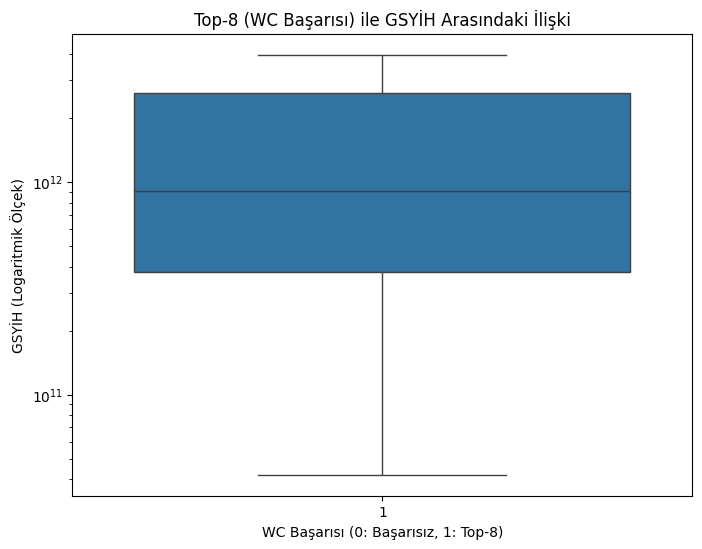

⚠️ Value verisi bulunamadı veya boş.


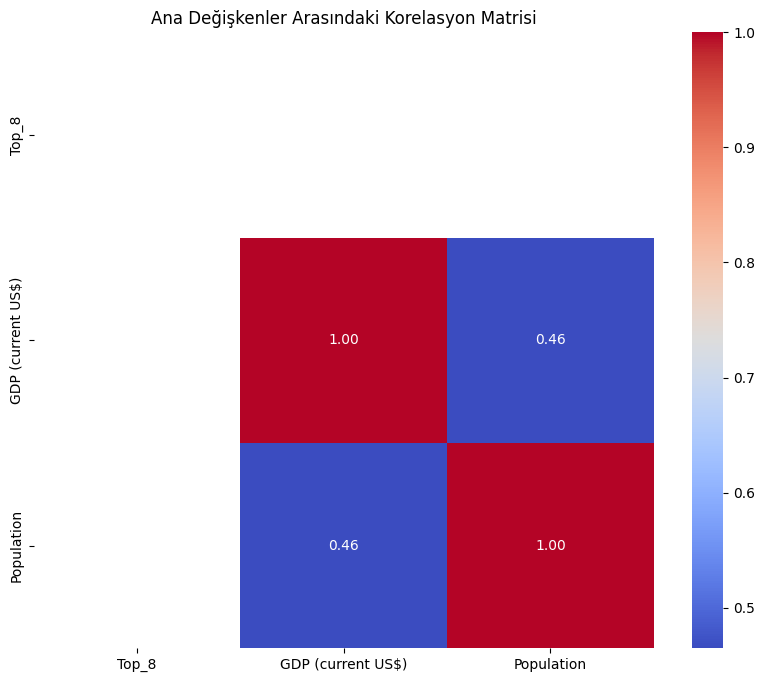

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# GDP sütununu kontrol et
gdp_col = None
for col in ['GDP (current US$)', 'GDP_per_capita', 'GDP']:
    if col in df_main.columns:
        gdp_col = col
        break

if gdp_col and df_main[gdp_col].notna().sum() > 0:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Top_8', y=gdp_col, data=df_main)
    plt.yscale('log')
    plt.title('Top-8 (WC Başarısı) ile GSYİH Arasındaki İlişki')
    plt.xlabel('WC Başarısı (0: Başarısız, 1: Top-8)')
    plt.ylabel('GSYİH (Logaritmik Ölçek)')
    plt.show()
else:
    print("⚠️ GDP verisi bulunamadı veya boş.")

# Value sütununu kontrol et
if 'Value' in df_main.columns and df_main['Value'].notna().sum() > 0:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Top_8', y='Value', data=df_main)
    plt.title('Top-8 ile Gıda Değeri (Value) Arasındaki İlişki')
    plt.xlabel('WC Başarısı (0: Başarısız, 1: Top-8)')
    plt.ylabel('Ortalama Gıda Göstergesi Değeri')
    plt.show()
else:
    print("⚠️ Value verisi bulunamadı veya boş.")

# Korelasyon matrisi
if len(correlation_matrix) > 0:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Ana Değişkenler Arasındaki Korelasyon Matrisi')
    plt.show()
else:
    print("⚠️ Korelasyon matrisi boş.")

In [12]:
import numpy as np
import pandas as pd
from scipy import stats

def run_welch_tests(df, target_col, feature_cols, min_n=5):
    out = []
    tmp = df[[target_col] + feature_cols].copy()
    tmp = tmp.dropna(subset=[target_col])

    grp1 = tmp[tmp[target_col] == 1]
    grp0 = tmp[tmp[target_col] == 0]

    for col in feature_cols:
        x1 = grp1[col].dropna()
        x0 = grp0[col].dropna()

        # numeric'e çevirmeye çalış (Year için gerekli)
        x1 = pd.to_numeric(x1, errors="coerce").dropna()
        x0 = pd.to_numeric(x0, errors="coerce").dropna()

        n1, n0 = len(x1), len(x0)

        if n1 < min_n or n0 < min_n:
            out.append({
                "feature": col,
                "n_top8": n1,
                "n_non_top8": n0,
                "mean_top8": x1.mean() if n1 > 0 else np.nan,
                "mean_non_top8": x0.mean() if n0 > 0 else np.nan,
                "t_stat": np.nan,
                "p_value": np.nan,
                "cohens_d": np.nan,
                "note": "Insufficient data after cleaning"
            })
            continue

        t_stat, p_val = stats.ttest_ind(x1, x0, equal_var=False)

        s1, s0 = x1.std(ddof=1), x0.std(ddof=1)
        pooled = np.sqrt(((n1-1)*(s1**2) + (n0-1)*(s0**2)) / (n1+n0-2))
        d = (x1.mean() - x0.mean()) / pooled if pooled > 0 else np.nan

        out.append({
            "feature": col,
            "n_top8": n1,
            "n_non_top8": n0,
            "mean_top8": x1.mean(),
            "mean_non_top8": x0.mean(),
            "t_stat": t_stat,
            "p_value": p_val,
            "cohens_d": d,
            "note": ""
        })

    return pd.DataFrame(out).sort_values("p_value", na_position="last")


target_col = "Top_8"

feature_cols = ["Year"]

results = run_welch_tests(df_wc, target_col, feature_cols, min_n=5)
display(results)

print("Columns in df_wc:", df_wc.columns.tolist())


,feature,n_top8,n_non_top8,mean_top8,mean_non_top8,t_stat,p_value,cohens_d,note
0,Year,88,0,1978.909091,NaN,NaN,NaN,NaN,Insufficient data after cleaning


Columns in df_wc: ['Year', 'Stage_Text', 'Country', 'Top_8']


In [13]:
# Hipotez testi grubu kontrolü
print("--- Hipotez Testi Grubu Kontrolü ---")
print(f"Toplam Satır Sayısı: {df_main.shape[0]}")
print(f"Top-8 (Kazananlar/Finalistler) Sayısı: {df_main['Top_8'].sum()}")

# GDP sütununu kontrol et
gdp_col = None
for col in ['GDP (current US$)', 'GDP_per_capita', 'GDP']:
    if col in df_main.columns:
        gdp_col = col
        break

if gdp_col:
    df_non_top8_check = df_main[df_main['Top_8'] == 0].dropna(subset=[gdp_col])
    print(f"Top-8 Olmayan (0) {gdp_col} Verisi Olan Satır Sayısı: {len(df_non_top8_check)}")
    if len(df_non_top8_check) > 0:
        print(f"Top-8 Olmayan (0) İlk 5 Ülke: {df_non_top8_check['Country'].unique()[:5]}")
else:
    print("⚠️ GDP sütunu bulunamadı.")

--- Hipotez Testi Grubu Kontrolü ---
Toplam Satır Sayısı: 88
Top-8 (Kazananlar/Finalistler) Sayısı: 88
Top-8 Olmayan (0) GDP (current US$) Verisi Olan Satır Sayısı: 0


In [8]:
# =========================
# PANEL DATASET (Top8 + Non-Top8) OLUŞTUR
# =========================

# Sadece ilgili ülkeleri filtrele (hızlandırma için)
wc_countries = df_wc['Country'].unique().tolist()

# GDP verisinden sadece WC ülkelerini al
df_gdp_filtered = df_gdp_final[df_gdp_final['Country'].isin(wc_countries)].copy()

# Food verisinden sadece WC ülkelerini al  
df_food_filtered = df_food_pivot[df_food_pivot['Country'].isin(wc_countries)].copy()

# 1) Food + GDP baz paneli (ülke-yıl)
df_panel = pd.merge(
    df_food_filtered,
    df_gdp_filtered,
    on=["Country", "Year"],
    how="outer"
)

# 2) Dünya Kupası Top8 etiketini (Country-Year) bazında ekle
df_top8 = df_wc[["Country", "Year", "Top_8"]].drop_duplicates()

df_panel = pd.merge(
    df_panel,
    df_top8,
    on=["Country", "Year"],
    how="left"
)

# 3) Top_8 olmayanlara 0 ver (non-Top8)
df_panel["Top_8"] = df_panel["Top_8"].fillna(0).astype(int)

# 4) Hızlı kontrol raporu
print("✅ df_panel hazır")
print(f"Satır sayısı: {len(df_panel)}")
print(f"Top_8 dağılımı:\n{df_panel['Top_8'].value_counts(dropna=False)}")

print("\nÖrnek Top_8=1 satırlar:")
print(df_panel[df_panel["Top_8"]==1].head(3))

print("\nÖrnek Top_8=0 satırlar:")
print(df_panel[df_panel["Top_8"]==0].head(3))

✅ df_panel hazır
Satır sayısı: 527
Top_8 dağılımı:
Top_8
0    503
1     24
Name: count, dtype: int64

Örnek Top_8=1 satırlar:
      Country  Year  Food supply (kcal/capita/day)  GDP (current US$)  \
14  Argentina  2014                        2802.00    526319673731.64   
22  Argentina  2022                        2778.09    632790070063.12   
64    Belgium  2018                        2984.23    542638913427.92   

    Population  Top_8  
14 43024071.00      1  
22 45407904.00      1  
64 11427054.00      1  

Örnek Top_8=0 satırlar:
     Country  Year  Food supply (kcal/capita/day)  GDP (current US$)  \
0  Argentina  2000                            NaN    284203750000.00   
1  Argentina  2001                            NaN    268696750000.00   
2  Argentina  2002                        3353.36     97724004251.86   

   Population  Top_8  
0 37213984.00      0  
1 37624825.00      0  
2 38029349.00      0  


In [16]:
# =========================
# TOP8 vs NON-TOP8: MEAN TABLE
# =========================

eda_features = [
    "Food supply (kcal/capita/day)",
    "GDP (current US$)",
    "Population"
]

mean_table = (
    df_panel
    .groupby("Top_8")[eda_features]
    .mean()
    .rename(index={0: "Non-Top8", 1: "Top8"})
)

display(mean_table)


,Food supply (kcal/capita/day),GDP (current US$),Population
Top_8,,,
Non-Top8,2982.238871,1.559769e+12,5.036558e+07
Top8,2911.903870,1.474462e+12,5.807509e+07


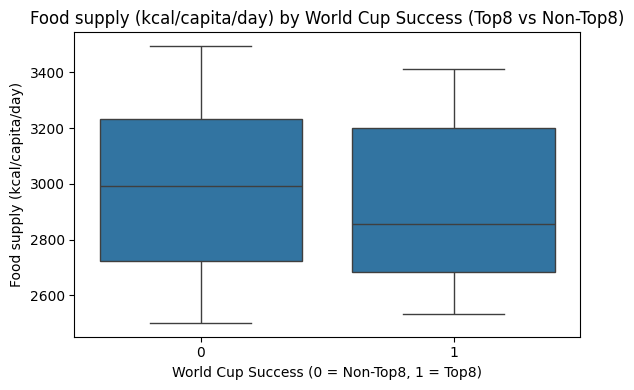

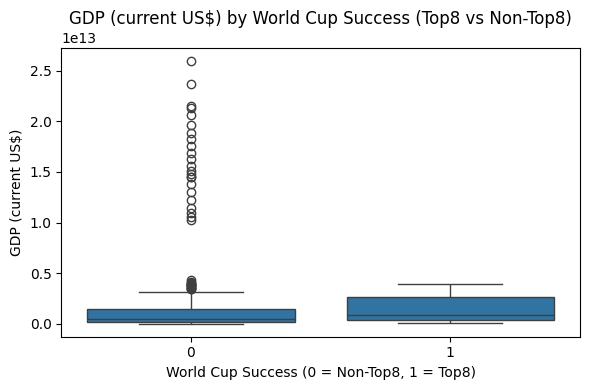

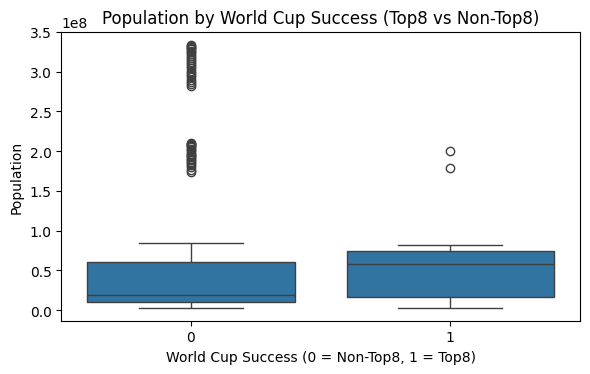

In [17]:
# =========================
# TOP8 vs NON-TOP8: BOXPLOTS
# =========================

import seaborn as sns
import matplotlib.pyplot as plt

for col in eda_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df_panel,
        x="Top_8",
        y=col
    )
    plt.title(f"{col} by World Cup Success (Top8 vs Non-Top8)")
    plt.xlabel("World Cup Success (0 = Non-Top8, 1 = Top8)")
    plt.tight_layout()
    plt.show()


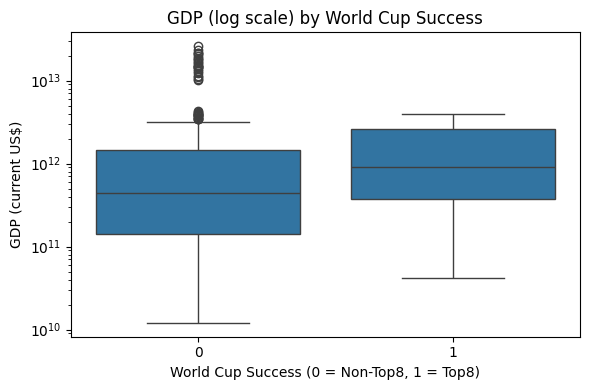

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_panel,
    x="Top_8",
    y="GDP (current US$)"
)
plt.yscale("log")
plt.title("GDP (log scale) by World Cup Success")
plt.xlabel("World Cup Success (0 = Non-Top8, 1 = Top8)")
plt.tight_layout()
plt.show()


In [19]:
mean_table_rounded = mean_table.copy()
mean_table_rounded["Food supply (kcal/capita/day)"] = mean_table_rounded["Food supply (kcal/capita/day)"].round(0)
mean_table_rounded["GDP (current US$)"] = mean_table_rounded["GDP (current US$)"] / 1e12
mean_table_rounded["GDP (current US$)"] = mean_table_rounded["GDP (current US$)"].round(2)
mean_table_rounded["Population"] = (mean_table_rounded["Population"] / 1e6).round(1)

mean_table_rounded.rename(columns={
    "GDP (current US$)": "GDP (trillion US$)",
    "Population": "Population (million)"
}, inplace=True)

display(mean_table_rounded)


,Food supply (kcal/capita/day),GDP (trillion US$),Population (million)
Top_8,,,
Non-Top8,2982.0,1.56,50.4
Top8,2912.0,1.47,58.1


In [9]:
# =========================
# HYPOTHESIS TESTING SETUP
# =========================
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

test_features = [
    "Food supply (kcal/capita/day)",
    "GDP (current US$)",
    "Population"
]

# Sadece gerekli kolonları al, NaN'leri test bazında düşüreceğiz
df_test = df_panel[["Top_8"] + test_features].copy()

# Log-transform GDP (testte daha stabil)
df_test["log_GDP"] = np.log(df_test["GDP (current US$)"])


In [10]:
# =========================
# WELCH T-TEST (Top8 vs Non-Top8)
# =========================

results = []

for col in ["Food supply (kcal/capita/day)", "log_GDP", "Population"]:
    g1 = df_test[df_test["Top_8"] == 1][col].dropna()
    g0 = df_test[df_test["Top_8"] == 0][col].dropna()
    
    t_stat, p_val = ttest_ind(g1, g0, equal_var=False)
    
    results.append({
        "feature": col,
        "mean_Top8": g1.mean(),
        "mean_NonTop8": g0.mean(),
        "t_stat": t_stat,
        "p_value": p_val,
        "n_Top8": len(g1),
        "n_NonTop8": len(g0)
    })

test_results = pd.DataFrame(results)
display(test_results)


,feature,mean_Top8,mean_NonTop8,t_stat,p_value,n_Top8,n_NonTop8
0,Food supply (kcal/capita/day),2980.49,3007.92,-0.46,0.65,24,291
1,log_GDP,27.37,26.82,1.82,0.08,23,483
2,Population,58075088.00,50365578.31,0.71,0.49,23,483


## Summary of EDA and Hypothesis Testing

The exploratory data analysis compares World Cup Top-8 and non-Top-8 country-year observations in terms of food supply, economic capacity, and population size.

The results indicate that raw, same-year averages of food supply and population do not show statistically significant differences between successful and unsuccessful teams. GDP, when log-transformed, exhibits a marginally significant association with World Cup success, suggesting that economic capacity may play a supporting role.

Overall, these findings imply that World Cup success cannot be explained by a single factor alone. Instead, success appears to be driven by a combination of nutritional, economic, and demographic variables. This motivates the use of multivariate machine learning models to capture joint effects and non-linear relationships.
